In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plot

In [2]:
conn = sqlite3.connect("../laliga.sqlite")
df = pd.read_sql("SELECT * FROM Matches;", conn)

In [3]:
df

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None


# Exercise 1

To be able to make a pie chart with the percentages of the home team wins, visitor team wins and ties, we need to extract the data from our df.

In [4]:
matches = df.copy()

In [5]:
valid_matches = matches[matches['score'].notna() & matches['score'].str.contains(':')].copy()

In [6]:
valid_matches[['home_goals', 'away_goals']] = (valid_matches['score'].str.split(':', expand=True).astype(int))
valid_matches

,season,division,matchday,date,time,home_team,away_team,score,home_goals,away_goals
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3,2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5,0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1,1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0,2
...,...,...,...,...,...,...,...,...,...,...
48345,2021-2022,2,3,8/28/21,10:00 PM,Ponferradina,Girona,2:1,2,1
48346,2021-2022,2,3,8/29/21,5:00 PM,SD Amorebieta,UD Almería,2:1,2,1
48347,2021-2022,2,3,8/29/21,7:30 PM,CD Lugo,Real Valladolid,0:2,0,2
48348,2021-2022,2,3,8/29/21,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0,0,0


In [7]:
def get_result(row):
    if row['home_goals'] > row['away_goals']:
        return '1'
    elif row['home_goals'] < row['away_goals']:
        return '2'
    else:
        return 'X'  

In [8]:
valid_matches['result'] = valid_matches.apply(get_result, axis=1)
valid_matches

,season,division,matchday,date,time,home_team,away_team,score,home_goals,away_goals,result
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,3,2
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3,2,1
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5,0,1
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1,1,X
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...
48345,2021-2022,2,3,8/28/21,10:00 PM,Ponferradina,Girona,2:1,2,1,1
48346,2021-2022,2,3,8/29/21,5:00 PM,SD Amorebieta,UD Almería,2:1,2,1,1
48347,2021-2022,2,3,8/29/21,7:30 PM,CD Lugo,Real Valladolid,0:2,0,2,2
48348,2021-2022,2,3,8/29/21,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0,0,0,X


In [9]:
result_counts = valid_matches['result'].value_counts()
result_counts

result
1    25321
X    12280
2    10399
Name: count, dtype: int64

<Axes: >

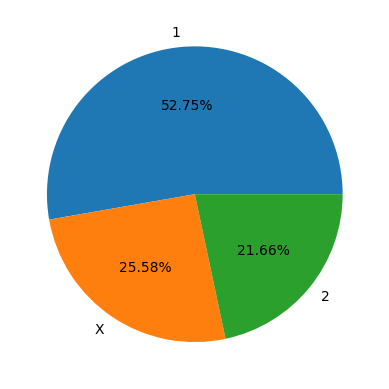

In [10]:
result_counts.plot(kind="pie", autopct = '%1.2f%%', legend = False, ylabel='')

We can see clearly that most matches are won by the local team. We could say that the local team has advantatge over the visitor.

# Exercise 2

First, we need to sort the data to get the total goals for each team.

In [11]:
first_division = valid_matches[valid_matches['division'] == 1].copy()

In [12]:
division1 = first_division.copy()

In [13]:
home_goals_scored = division1.groupby('home_team')['home_goals'].sum()

In [14]:
away_goals_scored = division1.groupby('away_team')['away_goals'].sum()

In [15]:
total_goals_scored = home_goals_scored.add(away_goals_scored, fill_value=0)

In [16]:
total_goals_scored.sort_values(ascending=False).head()

home_team
Barcelona          6267
Real Madrid        6249
Athletic           4802
Valencia           4615
Atlético Madrid    4184
dtype: int64

Secondly, we will compute the total goals conceded for each team.

In [17]:
home_goals_conceded = division1.groupby('home_team')['away_goals'].sum()

In [18]:
away_goals_conceded = division1.groupby('away_team')['home_goals'].sum()

In [19]:
total_goals_conceded = home_goals_conceded.add(away_goals_conceded, fill_value=0)

In [20]:
team_goals = pd.DataFrame({'Goals Scored': total_goals_scored, 'Goals Conceded': total_goals_conceded})
team_goals

,Goals Scored,Goals Conceded
home_team,,
AD Almería,72,116
Alavés,608,852
Albacete,320,410
Arenas Club,227,308
Ath. Aviación,113,65
...,...,...
UD Salamanca,425,581
UE Lleida,29,48
Valencia,4615,3649


In [21]:
top10_scored = team_goals.sort_values(by='Goals Scored', ascending=False).head(10)

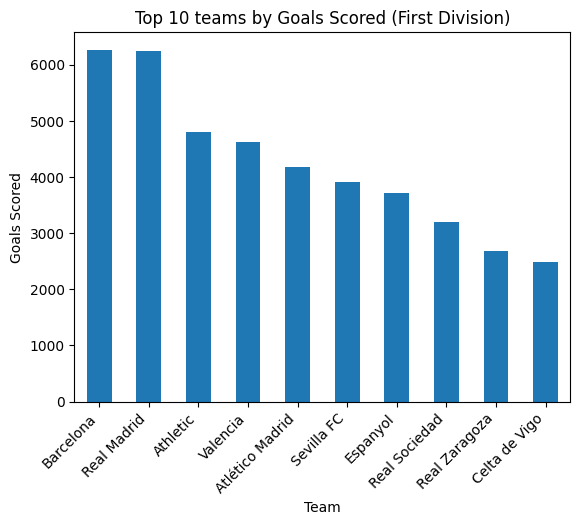

In [22]:
top10_scored['Goals Scored'].plot(kind='bar')
plot.title('Top 10 teams by Goals Scored (First Division)')
plot.ylabel('Goals Scored')
plot.xlabel('Team')
plot.xticks(rotation=45, ha='right')
plot.show()

In [23]:
top10_conceded = team_goals.sort_values(by='Goals Conceded', ascending=False).head(10)

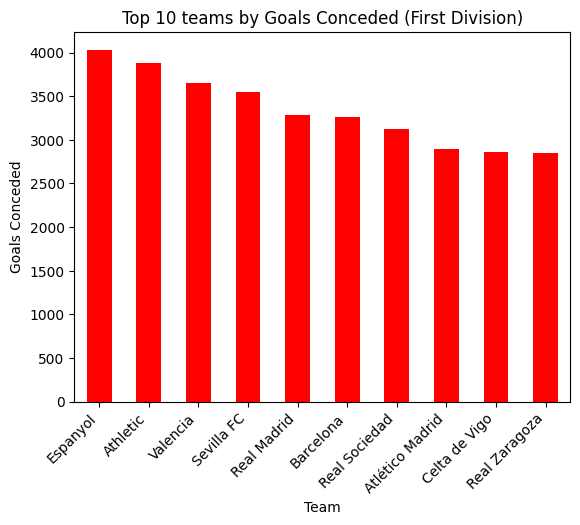

In [24]:
top10_conceded['Goals Conceded'].plot(kind='bar', color='red')
plot.title('Top 10 teams by Goals Conceded (First Division)')
plot.ylabel('Goals Conceded')
plot.xlabel('Team')
plot.xticks(rotation=45, ha='right')
plot.show()

Now, we will compute the matches with the biggest goal difference.

In [25]:
first_division['goal_difference'] = (first_division['home_goals'] - first_division['away_goals']).abs()

In [26]:
biggest_wins = first_division.sort_values(by='goal_difference', ascending=False).head(10)
biggest_wins

,season,division,matchday,date,time,home_team,away_team,score,home_goals,away_goals,result,goal_difference
225,1930-1931,1,10,2/8/31,None,Athletic,Barcelona,12:1,12,1,1,11
1071,1941-1942,1,1,9/28/41,None,Sevilla FC,Real Oviedo,10:0,10,0,1,10
936,1940-1941,1,1,9/29/40,None,Sevilla FC,Barcelona,11:1,11,1,1,10
1168,1941-1942,1,15,1/11/42,None,Athletic,Celta de Vigo,10:0,10,0,1,10
2787,1950-1951,1,11,11/19/50,None,Athletic,Lérida,10:0,10,0,1,10
6,1928-1929,1,2,2/17/29,None,Athletic,Espanyol,9:0,9,0,1,9
2537,1949-1950,1,2,9/11/49,None,Barcelona,Gimnàstic,10:1,10,1,1,9
408,1932-1933,1,10,1/29/33,None,Racing,Alavés,9:0,9,0,1,9
2771,1950-1951,1,9,11/5/50,None,Dep. La Coruña,Lérida,10:1,10,1,1,9
2969,1951-1952,1,3,9/23/51,None,Athletic,Real Zaragoza,10:1,10,1,1,9


What we have seen is that the two teams with the biggest number of goals are Barcelona and Real Madrid. The two teams with the largest number of conceded goals are Espanyol and Athletic. Finally, the match with the biggest difference in goals is athelic vs Barcelona in season 1930-1931.

# Exercise 3

In [27]:
df1 = matches.copy()

In [28]:
df1['new_date'] = pd.to_datetime(df1['date'], format='%m/%d/%y', errors='coerce')
df1

,season,division,matchday,date,time,home_team,away_team,score,new_date
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2029-02-10
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,2029-02-10
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,2029-02-10
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,2029-02-10
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,2029-02-12
...,...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None,2022-05-29
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None,2022-05-29
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None,2022-05-29
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None,2022-05-29


In [29]:
df1['weekday'] = df1['new_date'].dt.day_name()

In [30]:
weekday_counts = df1['weekday'].value_counts()
weekday_counts

weekday
Sunday       25195
Saturday     20073
Wednesday     1389
Friday         850
Monday         621
Thursday       345
Tuesday        307
Name: count, dtype: int64

<Axes: xlabel='weekday'>

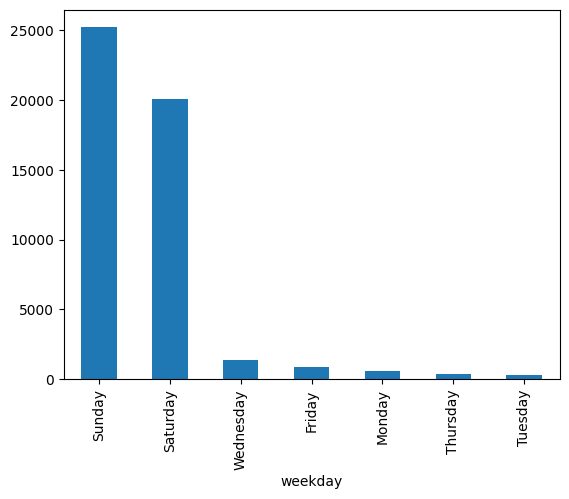

In [31]:
weekday_counts.plot(kind="bar")

In [32]:
df1['hour'] = pd.to_datetime(df1['time'], format='%I:%M %p', errors='coerce').dt.hour

In [33]:
hours = df1['hour'].dropna()

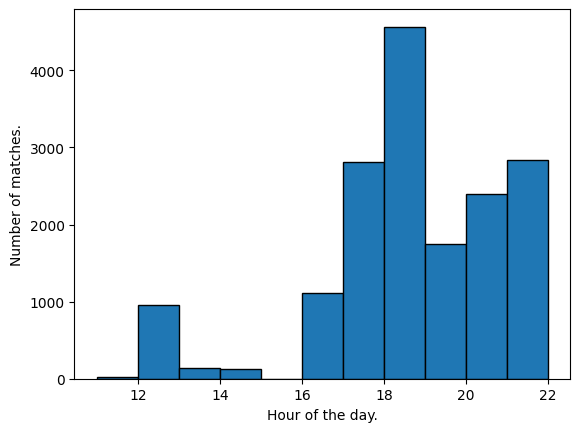

In [34]:
plot.hist(hours, bins=range(11,23), edgecolor='black')
plot.xlabel('Hour of the day.')
plot.ylabel('Number of matches.')
plot.show()

As we can see in both charts, matches mostly happen on weekends, especially on Sundays. Regarding the hours, they are more distributed during the afternoon and evening, mostly between 18 and 19.

In [35]:
df1_2000 = df1[df1['season'] == '2000-2001'].copy()
df1_2020 = df1[df1['season'] == '2020-2021'].copy()
df1_2000

,season,division,matchday,date,time,home_team,away_team,score,new_date,weekday,hour
17838,2000-2001,1,1,9/9/00,8:15 PM,Real Sociedad,Racing,2:2,2000-09-09,Saturday,20.0
17839,2000-2001,1,1,9/9/00,9:00 PM,Real Zaragoza,Espanyol,1:2,2000-09-09,Saturday,21.0
17840,2000-2001,1,1,9/9/00,9:00 PM,Barcelona,Málaga CF,2:1,2000-09-09,Saturday,21.0
17841,2000-2001,1,1,9/9/00,9:00 PM,Dep. La Coruña,Athletic,2:0,2000-09-09,Saturday,21.0
17842,2000-2001,1,1,9/9/00,9:00 PM,Real Madrid,Valencia,2:1,2000-09-09,Saturday,21.0
...,...,...,...,...,...,...,...,...,...,...,...
38693,2000-2001,2,42,6/17/01,None,Albacete,Uni. Las Palmas,2:3,2001-06-17,Sunday,NaN
38694,2000-2001,2,42,6/17/01,None,Elche CF,SD Compostela,2:2,2001-06-17,Sunday,NaN
38695,2000-2001,2,42,6/17/01,None,Sporting Gijón,Córdoba CF,2:2,2001-06-17,Sunday,NaN
38696,2000-2001,2,42,6/17/01,None,Real Jaén CF,Real Betis,0:2,2001-06-17,Sunday,NaN


In [36]:
weekday_counts_2000 = df1_2000['weekday'].value_counts()
weekday_counts_2020 = df1_2020['weekday'].value_counts()

In [37]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts_2000 = weekday_counts_2000.reindex(weekday_order).fillna(0)
weekday_counts_2020 = weekday_counts_2020.reindex(weekday_order).fillna(0)

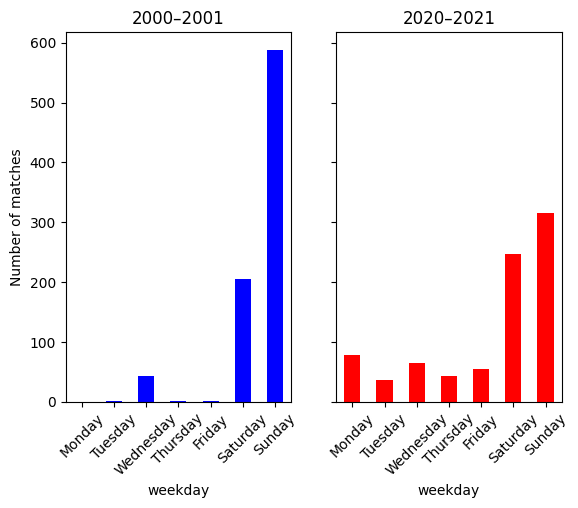

In [38]:
fig, axes = plot.subplots(1, 2, sharey=True)

weekday_counts_2000.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('2000–2001')
axes[0].set_ylabel('Number of matches')
axes[0].tick_params(axis='x', rotation=45)

weekday_counts_2020.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('2020–2021')
axes[1].tick_params(axis='x', rotation=45)

plot.show()

Now, we can see that the distribution of matches has changed during the week in recent years. We cannot appreciate this in the previous charts, since this difference has happened recently and most of the data is distributed as in the chart 2000-2001.

In [39]:
hours_2000 = df1_2000['hour'].dropna()
hours_2020 = df1_2020['hour'].dropna()

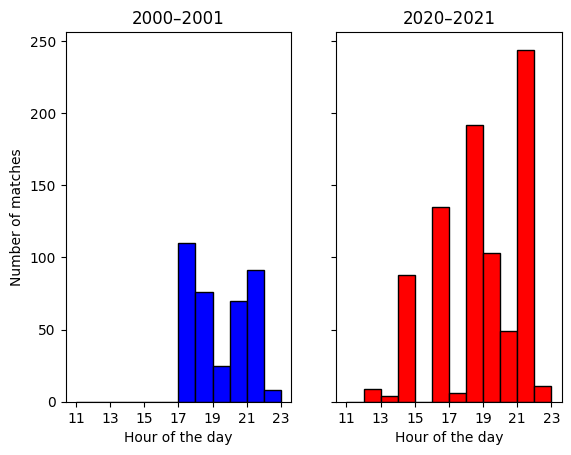

In [40]:
fig, axes = plot.subplots(1, 2, sharey=True)

axes[0].hist(hours_2000, bins=range(11,24), edgecolor='black', color='blue')
axes[0].set_title('2000–2001')
axes[0].set_xlabel('Hour of the day')
axes[0].set_ylabel('Number of matches')
axes[0].set_xticks(range(11,24,2))

axes[1].hist(hours_2020, bins=range(11,24), edgecolor='black', color='red')
axes[1].set_title('2020–2021')
axes[1].set_xlabel('Hour of the day')
axes[1].set_xticks(range(11,24,2))

plot.show()

Again, this is a clear indicator of the change of tendency of the kickoff hours of the matches, which we could not see in the first charts as we explained before.

# Exercise 4

In [41]:
df4 = first_division.copy()

In [42]:
df4_season = df4[(df4['season'] == '2020-2021')].copy()

In [43]:
df4_season['gd_signed'] = df4_season['home_goals'] - df4_season['away_goals'] # we will use this to intensify the colour of the cell.

In [44]:
teams_sorted = sorted(set(df4_season['home_team']).union(df4_season['away_team']))

In [45]:
used = set()          # Keeps abbreviations already taken
team2abbr = {}        # Final mapping: full name -> unique abbr

def make_abbr(name):
    # Split into words
    words = [w for w in str(name).split() if w] 
    first = words[0]
    last  = words[-1]

    base = last[:3].upper()
    cand = base

    if cand in used:
        cand = (first[0] + last[:2]).upper()

    i = 3
    while cand in used and i < len(last):
        i += 1
        cand = last[:i].upper()

    used.add(cand)
    return cand

In [46]:
for t in teams_sorted:
    team2abbr[t] = make_abbr(t)

In [47]:
abbr2team = {v: k for k, v in team2abbr.items()}

In [48]:
df4_season['home_abbr'] = df4_season['home_team'].map(team2abbr)
df4_season['away_abbr'] = df4_season['away_team'].map(team2abbr)

In [49]:
row_order = [abbr2team[a] for a in abbr_sorted if a in abbr2team]
gd_matrix = gd_matrix.reindex(index=row_order, columns=abbr_sorted)

NameError: name 'abbr_sorted' is not defined

In [50]:
gd_matrix = df4_season.pivot(index='home_team', columns='away_abbr', values='score').reindex(index=row_order, columns=abbr_sorted)

NameError: name 'row_order' is not defined

In [51]:
for team_full, team_abbr in team2abbr.items():
    if team_full in gd_matrix.index and team_abbr in gd_matrix.columns:
        gd_matrix.loc[team_full, team_abbr] = ''
# Make the diagonal

NameError: name 'gd_matrix' is not defined

In [52]:
diff_matrix = df4_season.pivot(index='home_team', columns='away_abbr', values='gd_signed').reindex(index=row_order, columns=abbr_sorted)

NameError: name 'row_order' is not defined

In [53]:
for team_full, team_abbr in team2abbr.items():
    if team_full in diff_matrix.index and team_abbr in diff_matrix.columns:
        diff_matrix.loc[team_full, team_abbr] = np.nan

NameError: name 'diff_matrix' is not defined

In [54]:
cap = np.nanmax(np.abs(diff_matrix.values))
if np.isnan(cap):
    cap = 1.0

NameError: name 'diff_matrix' is not defined

In [55]:
gd_display = gd_matrix.fillna('')

NameError: name 'gd_matrix' is not defined

In [56]:
styled = (
    gd_display.style
      .background_gradient(cmap='RdYlGn', axis=None, gmap=diff_matrix, vmin=-cap, vmax=cap)
      .format(na_rep='')                               # blanks instead of "nan"
      .highlight_null('white')              # white background for NaN cells
)

styled

NameError: name 'gd_display' is not defined

# Exercise 5

In [57]:
df5 = first_division[((first_division['home_team'] == 'Barcelona') & (df4['away_team'] == 'Real Madrid')) | ((first_division['home_team'] == 'Barcelona') & (first_division['away_team'] == 'Barcelona'))].copy()
# Barcelona and Real Madrid have never been in any other division (nor have Atletico de Madrid). We can work with the data from first_division without problems.

In [58]:
df5

,season,division,matchday,date,time,home_team,away_team,score,home_goals,away_goals,result,goal_difference
5,1928-1929,1,2,2/17/29,None,Barcelona,Real Madrid,1:2,1,2,2,1
131,1929-1930,1,9,1/26/30,None,Barcelona,Real Madrid,1:4,1,4,2,3
266,1930-1931,1,18,4/5/31,None,Barcelona,Real Madrid,3:1,3,1,1,2
356,1931-1932,1,18,4/3/32,None,Barcelona,Real Madrid,2:2,2,2,X,0
385,1932-1933,1,6,1/1/33,None,Barcelona,Real Madrid,1:1,1,1,X,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24049,2016-2017,1,14,12/3/16,4:15 PM,Barcelona,Real Madrid,1:1,1,1,X,0
24656,2017-2018,1,36,5/6/18,8:45 PM,Barcelona,Real Madrid,2:2,2,2,X,0
24775,2018-2019,1,10,10/28/18,4:15 PM,Barcelona,Real Madrid,5:1,5,1,1,4
25157,2019-2020,1,10,12/18/19,8:00 PM,Barcelona,Real Madrid,0:0,0,0,X,0


In [59]:
def winner_from_row(row):
    if row['result'] == '1':
        return row['home_team']
    elif row['result'] == '2':
        return row['away_team']
    else:
        return 'Tie'

In [60]:
df5['who_won'] = df5.apply(winner_from_row, axis=1)

In [61]:
win_counts = df5['who_won'].value_counts().reindex(['Barcelona', 'Tie', 'Real Madrid']).fillna(0).astype(int)
win_counts

who_won
Barcelona      50
Tie            20
Real Madrid    21
Name: count, dtype: int64

In [62]:
goals_barca = (df5.loc[df5['home_team'] == 'Barcelona', 'home_goals'].sum() + df5.loc[df5['away_team'] == 'Barcelona', 'away_goals'].sum())
goals_barca

np.int64(179)

In [63]:
goals_madrid = (df5.loc[df5['home_team'] == 'Real Madrid', 'home_goals'].sum() + df5.loc[df5['away_team'] == 'Real Madrid', 'away_goals'].sum())
goals_madrid

np.int64(108)

In [64]:
goal_counts = [int(goals_barca), int(goals_madrid)]
goal_labels = ['Barcelona', 'Real Madrid']

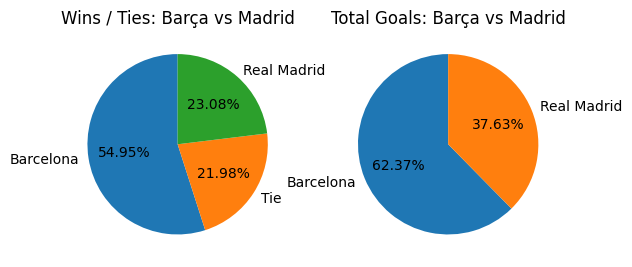

In [65]:
fig, axes = plot.subplots(1, 2, sharey=True)

axes[0].pie(win_counts.values, labels=win_counts.index, autopct='%1.2f%%', startangle=90)
axes[0].set_title('Wins / Ties: Barça vs Madrid')

axes[1].pie(goal_counts, labels=goal_labels, autopct='%1.2f%%', startangle=90)
axes[1].set_title('Total Goals: Barça vs Madrid')

plot.show()

Now, let's creat a function that does all this.

In [66]:
def plot_direct_confrontations_stats(team1, team2, df, season=None):
    
    sub = df[((df['home_team'] == team1) & (df['away_team'] == team2)) | ((df['home_team'] == team2) & (df['away_team'] == team1))].copy()

    if season is not None:
        sub = sub[sub['season'] == season].copy()

    if sub.empty:
        print("No matches found between those teams with the current filters.")
        return None
        
    sub['who_won'] = np.where(sub['result'] == '1', sub['home_team'], np.where(sub['result'] == '2', sub['away_team'], 'Tie'))

    win_counts = sub['who_won'].value_counts().reindex([team1, 'Tie', team2]).fillna(0).astype(int)

    goals_team1 = (sub.loc[sub['home_team'] == team1, 'home_goals'].sum() + sub.loc[sub['away_team'] == team1, 'away_goals'].sum())
    
    goals_team2 = (sub.loc[sub['home_team'] == team2, 'home_goals'].sum() + sub.loc[sub['away_team'] == team2, 'away_goals'].sum())

    fig, axes = plot.subplots(1, 2, figsize=(10, 4))

    axes[0].pie(win_counts.values, labels=win_counts.index, autopct='%1.2f%%', startangle=90)
    axes[0].set_title(f'Wins / Ties: {team1} vs {team2}')

    axes[1].pie([int(goals_team1), int(goals_team2)], labels=[team1, team2], autopct='%1.2f%%', startangle=90)
    axes[1].set_title(f'Total Goals: {team1} vs {team2}')

    plot.tight_layout()
    plot.show()


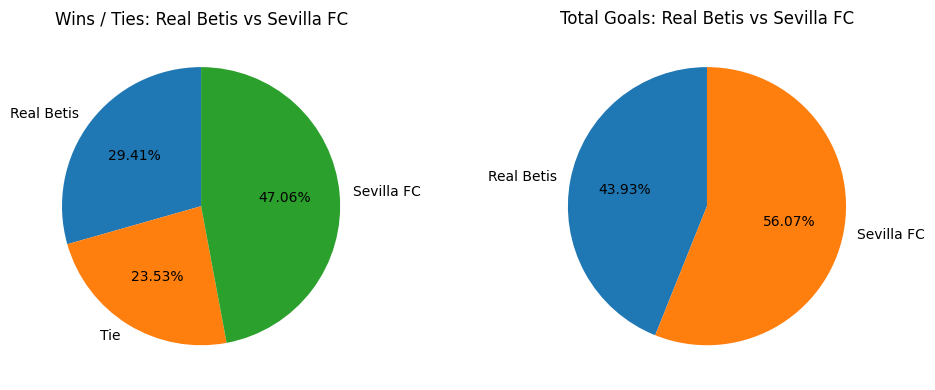

In [67]:
plot_direct_confrontations_stats('Real Betis', 'Sevilla FC', valid_matches, None)

# Exercise 6

In [68]:
valid_matches['date_dt'] = pd.to_datetime(valid_matches['date'], errors='coerce')
mask = valid_matches['date_dt'].isna()
valid_matches.loc[mask, 'date_dt'] = pd.to_datetime(valid_matches.loc[mask, 'date'], dayfirst=True, errors='coerce')

/tmp/ipykernel_15894/303481903.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  valid_matches['date_dt'] = pd.to_datetime(valid_matches['date'], errors='coerce')


In [69]:
def team_matches(df, team):
    team_df = df[(df['home_team'] == team) | (df['away_team'] == team)].copy()
    team_df = team_df.sort_values('date_dt')
    
    def is_undefeated(row):
        if row['result'] == 'X':
            return True
        if row['result'] == '1' and row['home_team'] == team:
            return True
        if row['result'] == '2' and row['away_team'] == team:
            return True
        return False

    team_df['undefeated'] = team_df.apply(is_undefeated, axis=1)
    return team_df

In [70]:
def longest_streak(df, team):
    team_df = team_matches(df, team)
    team_df = team_df.sort_values('date_dt').reset_index(drop=True)

    longest = 0
    current = 0
    best_start = None
    best_end = None

    for i in range(len(team_df)):
        if team_df.loc[i, 'undefeated']:
            current += 1
            if current == 1:
                start = team_df.loc[i, 'date_dt']
            if current > longest:
                longest = current
                best_start = start
                best_end = team_df.loc[i, 'date_dt']
        else:
            current = 0

    if pd.notna(best_start):
        start_str = best_start.strftime('%d/%m/%Y')
    else:
        start_str = None

    if pd.notna(best_end):
        end_str = best_end.strftime('%d/%m/%Y')
    else:
        end_str = None
    
    return longest, start_str, end_str

In [71]:
longest_streak(valid_matches, 'Real Sociedad')

(38, '29/04/1979', '04/05/1980')

In [72]:
teams = sorted(set(valid_matches['home_team']).union(valid_matches['away_team']))

In [73]:
streaks_df = []
for t in teams:
    length, start, end = longest_streak(valid_matches, t)
    streaks_df.append({'team': t, 'streak': int(length), 'start': start, 'end': end})
streaks_df = pd.DataFrame(streaks_df)

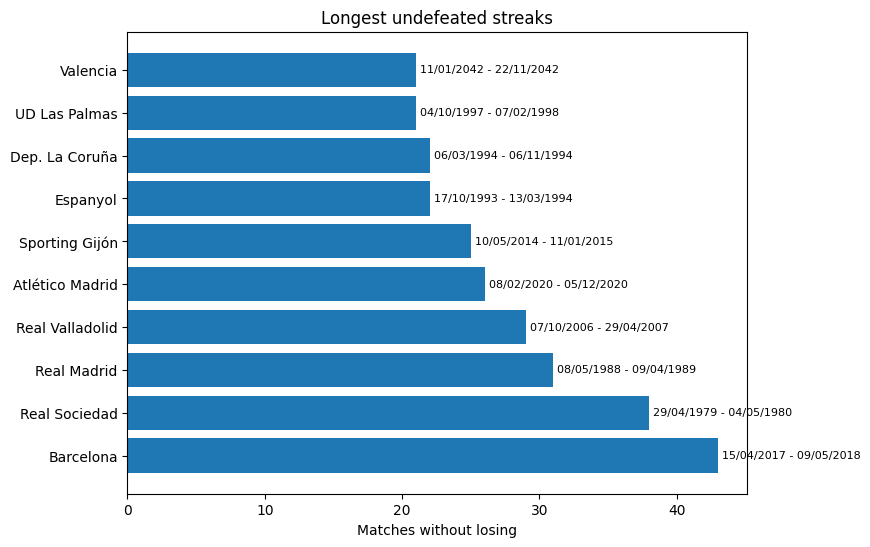

In [74]:
top10 = streaks_df.sort_values('streak', ascending=False).head(10)

plot.figure(figsize=(8, 6))
plot.barh(top10['team'], top10['streak'])

plot.xlabel('Matches without losing')
plot.title('Longest undefeated streaks')

for i, row in enumerate(top10.itertuples()):
    plot.text(row.streak + 0.3, i, f"{row.start} - {row.end}", va='center', fontsize=8)

plot.show()

# Exercise 7

In [75]:
df7 = valid_matches.copy()

In [76]:
df7['result'] = df7['result'].astype(str)

In [77]:
home = df7[['season','division','home_team','home_goals','away_goals','result']].copy()

In [78]:
home = home.rename(columns={'home_team':'team', 'home_goals':'GF', 'away_goals':'GA'})
home['W'] = (home['result'] == '1').astype(int)
home['L'] = (home['result'] == '2').astype(int)
home['T'] = (home['result'] == 'X').astype(int)
home['Pts'] = home['W']*3 + home['T']*1

In [79]:
cols = ['season','division','team','GF','GA','W','L','T','Pts']
home = home[cols] 

In [80]:
away = df7[['season','division','away_team','home_goals','away_goals','result']].copy()

In [81]:
away = away.rename(columns={'away_team':'team', 'away_goals':'GF', 'home_goals':'GA'})
away['W'] = (away['result'] == '2').astype(int)
away['L'] = (away['result'] == '1').astype(int)
away['T'] = (away['result'] == 'X').astype(int)
away['Pts'] = away['W']*3 + away['T']*1

In [82]:
away = away[cols]

In [83]:
long = pd.concat([home, away], ignore_index=True)
long

,season,division,team,GF,GA,W,L,T,Pts
0,1928-1929,1,Arenas Club,2,3,0,1,0,0
1,1928-1929,1,Espanyol,3,2,1,0,0,3
2,1928-1929,1,Real Madrid,5,0,1,0,0,3
3,1928-1929,1,Donostia,1,1,0,0,1,1
4,1928-1929,1,Racing,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...
95995,2021-2022,2,Girona,1,2,0,1,0,0
95996,2021-2022,2,UD Almería,1,2,0,1,0,0
95997,2021-2022,2,Real Valladolid,2,0,1,0,0,3
95998,2021-2022,2,CF Fuenlabrada,0,0,0,0,1,1


In [84]:
standings = (long.groupby(['season','division','team'], as_index=False).agg(GF=('GF','sum'), GA=('GA','sum'), W =('W','sum'), L =('L','sum'), T =('T','sum'), Pts=('Pts','sum')))

In [85]:
standings['GD'] = standings['GF'] - standings['GA']

In [86]:
num_cols = ['GF','GA','W','L','T','Pts','GD']
standings[num_cols] = standings[num_cols].astype(int)

In [87]:
standings = standings.sort_values(['season','division','Pts','GD','GF'], ascending=[False, True, False, False, False])

In [88]:
standings['rank'] = standings.groupby(['season','division'], sort=False).cumcount() + 1

In [89]:
standings

,season,division,team,GF,GA,W,L,T,Pts,GD,rank
2759,2021-2022,1,Real Madrid,8,4,2,0,1,7,4,1
2761,2021-2022,1,Sevilla FC,5,1,2,0,1,7,4,2
2762,2021-2022,1,Valencia,5,1,2,0,1,7,4,3
2747,2021-2022,1,Barcelona,7,4,2,0,1,7,3,4
2746,2021-2022,1,Atlético Madrid,5,3,2,0,1,7,2,5
...,...,...,...,...,...,...,...,...,...,...,...
2,1928-1929,1,Athletic Madrid,43,41,8,8,2,26,2,6
6,1928-1929,1,Espanyol,32,38,7,7,4,25,-6,7
4,1928-1929,1,Catalunya,45,49,6,8,4,22,-4,8
9,1928-1929,1,Real Unión,40,42,5,11,2,17,-2,9


The only thing left is to expord it to .xlsx

In [90]:
import os
os.makedirs('reports', exist_ok=True)

out_path = 'reports/SeasonStandings.xlsx'
standings.to_excel(out_path, index=False)
print("Saved:", out_path)

Saved: reports/SeasonStandings.xlsx
